In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("weatherAUS.csv")
df.dropna(subset="RainTomorrow", inplace=True)

In [3]:
numerical_cols = list(df.select_dtypes(include=np.number).columns)
categorical_cols = list(df.select_dtypes(include='object').columns)[1:-1]
target_cols = 'RainTomorrow'

In [4]:
df[categorical_cols].isna().sum()

Location           0
WindGustDir     9330
WindDir9am     10013
WindDir3pm      3778
RainToday       1406
dtype: int64

In [5]:
df[numerical_cols].isna().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
dtype: int64

In [6]:
a = list(pd.to_datetime(df['Date']).dt.year.unique())
a[0: (len(a) * 80) // 100]
## We picking 80% of the date i.e from year 2015 and below for training

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]

In [7]:
years = pd.to_datetime(df['Date']).dt.year
years

0         2008
1         2008
2         2008
3         2008
4         2008
          ... 
145454    2017
145455    2017
145456    2017
145457    2017
145458    2017
Name: Date, Length: 142193, dtype: int64

In [8]:
train_df = df[years < 2015]
val_df = df[years == 2015]
test_df = df[years > 2015]

In [9]:
input_cols = numerical_cols + categorical_cols
train_targets = train_df[target_cols].copy()
train_inputs = train_df[input_cols].copy()

In [10]:
val_targets = val_df[target_cols].copy()
val_inputs = val_df[input_cols].copy()

In [11]:
test_targets = test_df[target_cols].copy()
test_inputs = test_df[input_cols].copy()

In [12]:
train_inputs[numerical_cols].describe()
# Mean of evaporation is 5.282092
#  Sunshine is 7.593952

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,98554.000000,98790.00000,97988.000000,61878.00000,58292.000000,92086.000000,97855.000000,97848.000000,97723.000000,97802.000000,89643.000000,89679.000000,63224.000000,62222.000000,98205.000000,98325.000000
mean,12.002014,23.00288,2.372935,5.28686,7.602136,40.230969,14.102192,18.770430,68.651822,51.501728,1017.518046,1015.138523,4.308048,4.414451,16.827340,21.525622
std,6.345487,6.99008,8.518819,3.95104,3.788266,13.713042,8.994121,8.877497,18.995535,20.742760,7.073083,6.997504,2.867317,2.694295,6.399855,6.832509
min,-8.500000,-4.10000,0.000000,0.00000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,979.000000,0.000000,0.000000,-5.900000,-5.100000
25%,7.500000,17.80000,0.000000,2.60000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.800000,1010.400000,1.000000,2.000000,12.200000,16.600000
50%,11.800000,22.40000,0.000000,4.60000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.500000,1015.100000,5.000000,5.000000,16.500000,20.900000
75%,16.600000,27.90000,0.800000,7.20000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.300000,1019.900000,7.000000,7.000000,21.300000,26.100000
max,33.900000,48.10000,371.000000,82.40000,14.300000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.100000


In [13]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
imputer.fit(df[numerical_cols])

SimpleImputer()

In [14]:
# df[numerical_cols] = imputer.transform(df[numerical_cols])
train_inputs[numerical_cols] = imputer.transform(train_inputs[numerical_cols])
test_inputs[numerical_cols] = imputer.transform(test_inputs[numerical_cols])
val_inputs[numerical_cols] = imputer.transform(val_inputs[numerical_cols])

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[numerical_cols])

MinMaxScaler()

In [16]:
# df[numerical_cols] = imputer.transform(df[numerical_cols])
train_inputs[numerical_cols] = scaler.transform(train_inputs[numerical_cols])
test_inputs[numerical_cols] = scaler.transform(test_inputs[numerical_cols])
val_inputs[numerical_cols] = scaler.transform(val_inputs[numerical_cols])

In [17]:
train_inputs[categorical_cols] = train_df[categorical_cols].fillna("Unknown")
val_inputs[categorical_cols] = val_df[categorical_cols].fillna("Unknown")
test_inputs[categorical_cols] = test_df[categorical_cols].fillna("Unknown")

In [18]:
train_targets.isna().sum()

0

In [19]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [20]:
encoder.fit(train_inputs[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [22]:
encoded_cols = list(encoder.get_feature_names_out())
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
encoded_cols

['Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_Uluru',
 'Location_WaggaWagga',
 'Location_Walpole',
 'Locat

In [24]:
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])

In [26]:
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [27]:
X_train = train_inputs[numerical_cols + encoded_cols]
X_test = test_inputs[numerical_cols + encoded_cols]
X_val = val_inputs[numerical_cols + encoded_cols]
# list(encoded_cols)

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
model = DecisionTreeClassifier(random_state=42, max_depth=7)

In [30]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [31]:
train_preds = model.predict(X_train)

In [32]:
pd.DataFrame(train_preds).value_counts()

No     84911
Yes    14077
dtype: int64

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix

<Axes: >

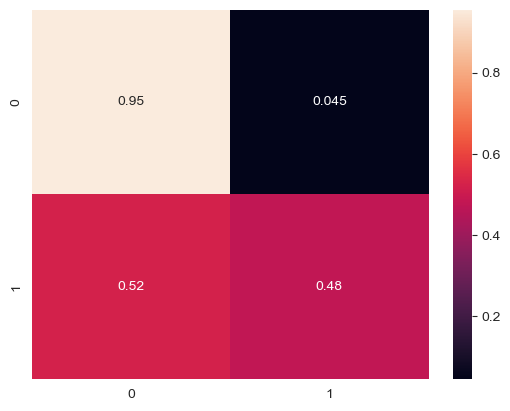

In [34]:
accuracy_score(train_targets, train_preds)
cf = confusion_matrix(train_targets, train_preds, normalize='true')
sns.heatmap(cf, annot=True)

In [35]:
val_preds = model.predict(X_val)

<Axes: >

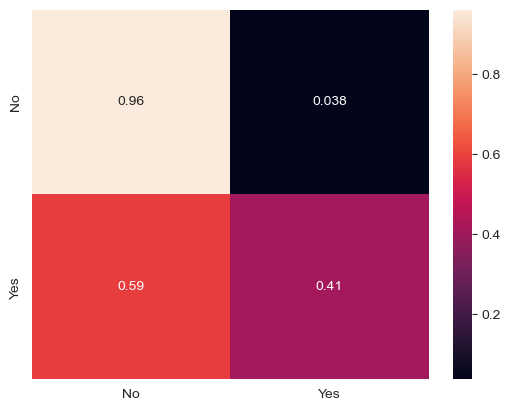

In [36]:
accuracy_score(val_targets, val_preds)
cf = confusion_matrix(val_targets, val_preds, normalize='true')
sns.heatmap(cf, annot=True,yticklabels=['No', 'Yes'], xticklabels=['No', 'Yes'],)

In [37]:
test_preds = model.predict(X_test)

In [38]:
accuracy_score(test_targets, test_preds)

0.8311003311003311

In [39]:
def estimate_decision_tree(max_d):
    model = DecisionTreeClassifier(max_depth=max_d, random_state=42)
    model.fit(X_train, train_targets)
    
    train_accuracy = model.score(X_train, train_targets)
    val_accuracy = model.score(X_val, val_targets)
    
    train_error = 1 - train_accuracy
    val_error = 1- val_accuracy
    
    train_accuracy = model.score(X_val, val_targets)
#     print(f"The training accuracy score is {train_accuracy} having an error percentage of {train_error}")
#     print(f"The validation accuracy score is {val_accuracy} having an error percentage of {val_error}")   
    errors_df = dict(Max_Depth = max_d, Training_Error = train_error, Validation_Error= val_error)
    return val_accuracy, train_accuracy, errors_df


In [40]:

# for i in np.arange(1, 40):
#     if estimate_decision_tree(i)[0]  > j:
#         j = estimate_decision_tree(i)[0]
#         print(j, i)
    
# np.arange(1, 40)

In [41]:
def estimate_decision_treeB(max_d):
    model = DecisionTreeClassifier(max_depth=max_d, random_state=42)
    model.fit(X_train, train_targets)
    
    train_accuracy = model.score(X_train, train_targets)
    val_accuracy = model.score(X_val, val_targets)
    
    train_error = 1 - train_accuracy
    val_error = 1- val_accuracy
    
    train_accuracy = model.score(X_val, val_targets)
#     print(f"The training accuracy score is {train_accuracy} having an error percentage of {train_error}")
#     print(f"The validation accuracy score is {val_accuracy} having an error percentage of {val_error}")   
    errors_df = dict(Max_Depth = max_d, Training_Error = train_error, Validation_Error= val_error)
    return errors_df


In [42]:
errors_df = [estimate_decision_treeB(d) for d in range(1, 20)]

In [43]:
f = pd.DataFrame(errors_df)

<Axes: xlabel='Max_Depth', ylabel='Training_Error'>

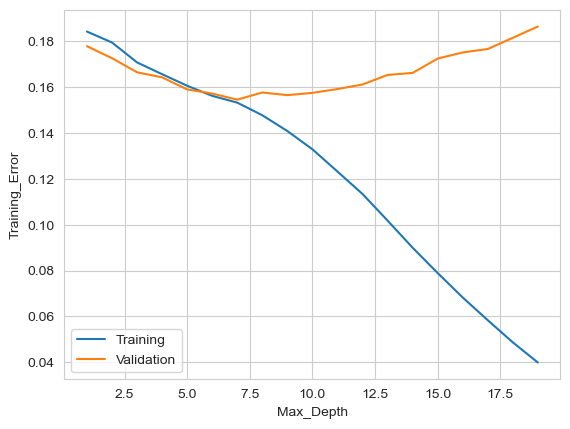

In [44]:
fig, ax = plt.subplots()

sns.lineplot(x=f['Max_Depth'], ax=ax, y=f["Training_Error"], label="Training")
sns.lineplot(x=f['Max_Depth'], y=f["Validation_Error"], label="Validation")

In [45]:
estimate_decision_treeB(6)['Validation_Error'] > estimate_decision_treeB(7)['Training_Error']

True

In [48]:
def estimate_decision_treeB(max_d):
    model = DecisionTreeClassifier(max_leaf_nodes=max_d, random_state=42)
    model.fit(X_train, train_targets)
    
    train_accuracy = model.score(X_train, train_targets)
    val_accuracy = model.score(X_val, val_targets)
    
    train_error = 1 - train_accuracy
    val_error = 1- val_accuracy
    
    train_accuracy = model.score(X_val, val_targets)
#     print(f"The training accuracy score is {train_accuracy} having an error percentage of {train_error}")
#     print(f"The validation accuracy score is {val_accuracy} having an error percentage of {val_error}")   
    errors_df = dict(Max_Depth = max_d, Training_Error = train_error, Validation_Error= val_error)
    return errors_df


In [50]:
j = estimate_decision_treeB(164)
j
# for i in np.arange(157, 400):
#     if estimate_decision_treeB(i)  > j:
#         j = estimate_decision_treeB(i)
#         print(j, i)

{'Max_Depth': 164,
 'Training_Error': 0.14880591586859016,
 'Validation_Error': 0.15495328187568913}

In [51]:
modelB = DecisionTreeClassifier(max_leaf_nodes=164, random_state=42)

In [52]:
modelB.fit(X_train, train_targets)

DecisionTreeClassifier(max_leaf_nodes=164, random_state=42)

In [53]:
X_train_preds = modelB.predict(X_train)

In [54]:
accuracy_score(train_targets, X_train_preds)

0.8511940841314098

In [55]:
from sklearn.metrics import confusion_matrix
val_predsB = modelB.predict(X_val)

In [56]:
accuracy_score(val_targets, val_predsB)

0.8450467181243109

<Axes: >

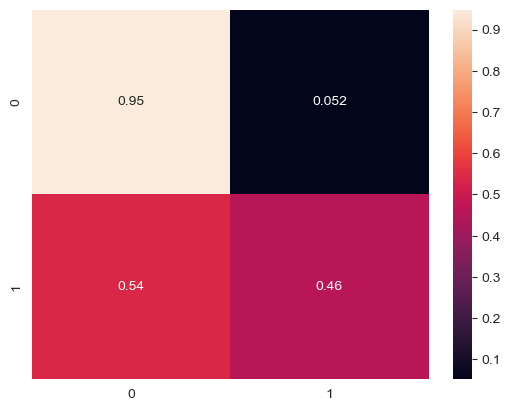

In [57]:
cf = confusion_matrix(val_targets, val_predsB, normalize='true')
sns.heatmap(cf, annot=True)

In [58]:
test_predsB = modelB.predict(X_test)

In [59]:
accuracy_score(test_targets, test_predsB)

0.8328713328713329

### Random Forest Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
model = RandomForestClassifier(random_state=42, n_jobs=-1)

In [62]:
model.fit(X_train, train_targets)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [63]:
model.score(X_train, train_targets)

0.9999595910615429

In [64]:
model.score(X_val, val_targets)

0.8559572862863444

In [65]:
model.score(X_test, test_targets)

0.8455763455763455

In [70]:
len(model.estimators_)
model.predict_proba(X_train)

array([[0.9 , 0.1 ],
       [0.97, 0.03],
       [0.99, 0.01],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.95, 0.05]])

In [72]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(80, 20), dpi=300)
plot_tree(model.estimators_[0], max_depth=3, feature_names = X_train.columns, filled=True, rounded=True)

[Text(0.5, 0.9, 'RainToday_Yes <= 0.5\ngini = 0.347\nsamples = 62607\nvalue = [76887, 22101]'),
 Text(0.25, 0.7, 'Cloud9am <= 0.611\ngini = 0.262\nsamples = 48769\nvalue = [65102, 11926]'),
 Text(0.125, 0.5, 'WindDir9am_E <= 0.5\ngini = 0.212\nsamples = 36906\nvalue = [51301, 7031]'),
 Text(0.0625, 0.3, 'RainToday_No <= 0.5\ngini = 0.219\nsamples = 34191\nvalue = [47292, 6782]'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'Sunshine <= 0.507\ngini = 0.11\nsamples = 2715\nvalue = [4009, 249]'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'WindDir9am_N <= 0.5\ngini = 0.387\nsamples = 11863\nvalue = [13801, 4895]'),
 Text(0.3125, 0.3, 'RainToday_Unknown <= 0.5\ngini = 0.372\nsamples = 10690\nvalue = [12681, 4158]'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'Cloud3pm <= 0.722\ngini = 0.479\nsamples = 1173\nvalue = [1120, 737]'),
 Text(0.

In [83]:
# print(export_text(model.estimators_[0], max_depth=5))
dir(model.estimators_[0])

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_prune_tree',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_X_predict',
 '_validate_data',
 '_validate_params',
 'apply',
 'ccp_alpha',
 'class_weight',
 'classes_',
 'cost_complexity_pruning_path',
 'criterion',
 'decision_path',
 'feature_importances_',
 'fit',
 'get_depth',
 'get_n_leaves',
 'get_params',
 'max_depth',
 'max_features',
 'max_features_',
 'max_le

<Axes: xlabel='importances', ylabel='name'>

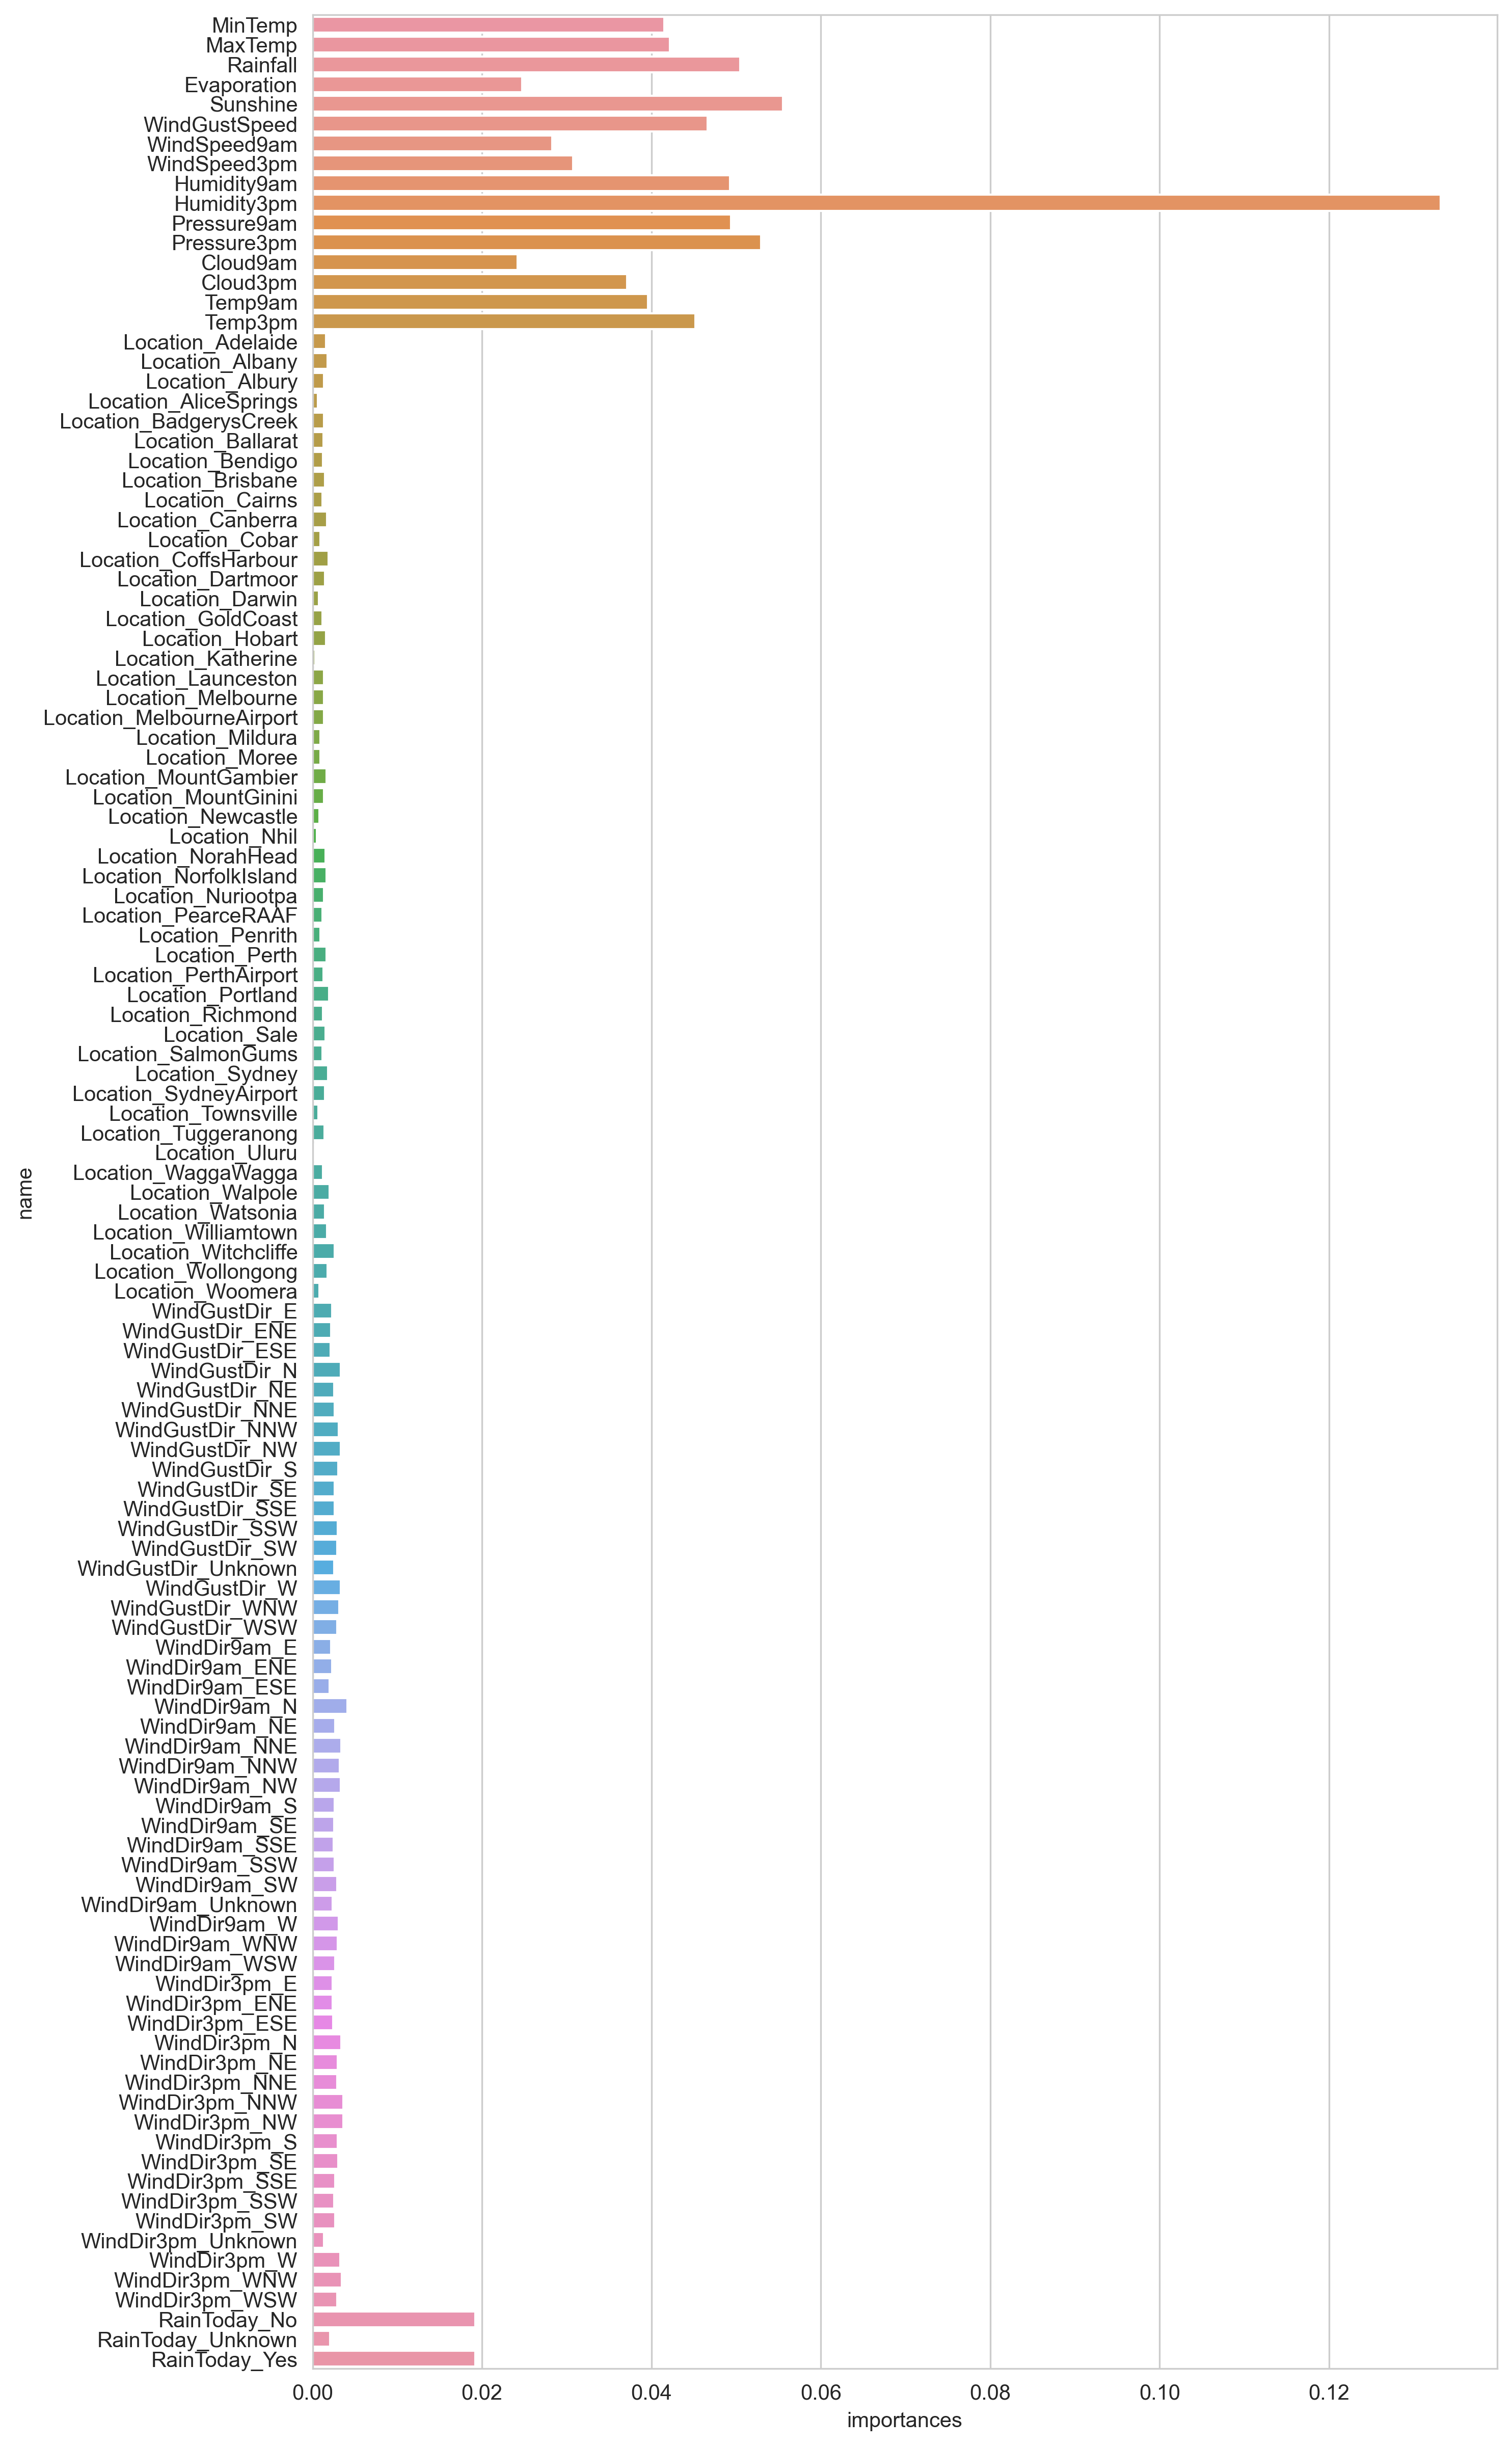

In [84]:
a = pd.DataFrame({"name": X_train.columns, "importances": model.feature_importances_})
plt.figure(figsize=(10, 20), dpi=300)
sns.barplot(a, x='importances', y='name')


In [85]:
?RandomForestClassifier

###### N estimators: This argument controls the number of decision tree in the random forest, the default value is 100. As a general rule, try to have as few estimators as needed
As you increase the number of estimators, you increase the randomness within the data 
NB: The more randomness you bring into your model the less overfitting you will have

In [86]:
base_model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=500).fit(X_train, train_targets)

In [87]:
base_model.fit(X_train, train_targets)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

In [88]:
base_model.score(X_train, train_targets)

0.9999797955307714

In [89]:
val_preds = base_model.predict(X_val)
base_model.score(X_val, val_targets)

0.8572920898380825

<Axes: >

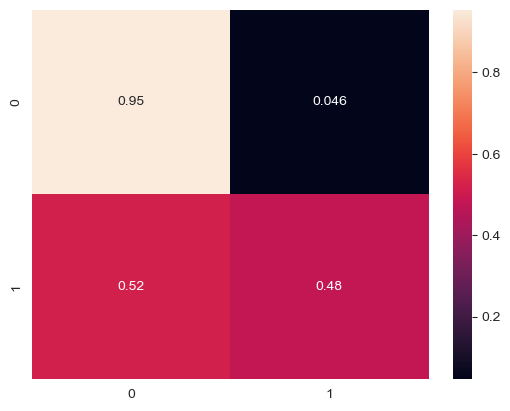

In [90]:
test_preds = base_model.predict(X_test)
cf = confusion_matrix(test_targets, test_preds, normalize='true')
sns.heatmap(cf, annot=True)

<Axes: >

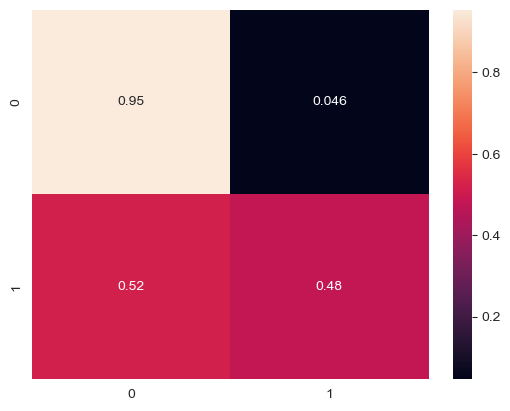

In [91]:
cf = confusion_matrix(test_targets, test_preds, normalize='true')
sns.heatmap(cf, annot=True)

#### Max depth and max leaf nodes

In [92]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(X_train, train_targets)
    return model.score(X_train, train_targets), model.score(X_val, val_targets)

In [101]:
test_params(max_depth=20)

(0.8545480260233563, 0.8440020892577331)

In [94]:
test_params(max_leaf_nodes=2**10)

(0.878540833232311, 0.8513725262608091)

In [103]:
test_params(max_leaf_nodes=2**5, max_depth=10, n_estimators=800)

(0.8309593081989736, 0.8337299054030526)

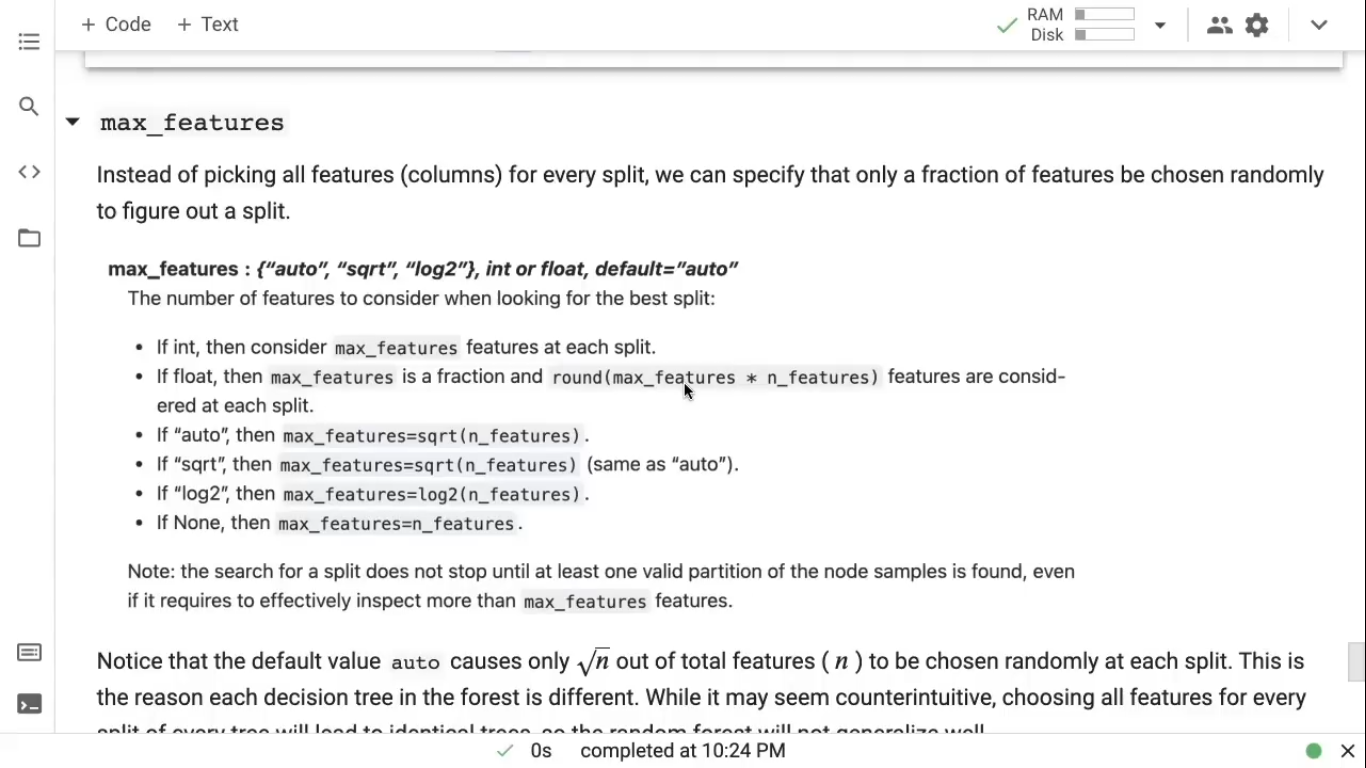
Where n_features are the columns avalilable to train

In [104]:
test_params(max_features='log2')

(0.9999595910615429, 0.8540421333642852)

In [105]:
test_params(max_features=6)

(0.9999595910615429, 0.8540421333642852)

In [106]:
test_params(max_features='sqrt')

(0.9999595910615429, 0.8559572862863444)

In [107]:
test_params(max_features='log2')

(0.9999595910615429, 0.8540421333642852)

In [113]:
test_params(min_samples_split=100, min_samples_leaf=100)

(0.8450418232513032, 0.8428413905170913)

In [120]:
test_params(min_impurity_decrease=1e-8)

(0.9999393865923142, 0.8565956705936975)

In [134]:
test_params(bootstrap=False)
# (0.9999797955307714, 0.8558992513493123)

(0.9999797955307714, 0.8558992513493123)

In [130]:
test_params(max_samples=90)
# (0.8284135450761708, 0.8310602982995764)

(0.8284135450761708, 0.8310602982995764)

In [127]:
test_params(class_weight='balanced')

(0.9999494888269285, 0.8556671116011839)

In [137]:
test_params(class_weight={"No": 0.5, "Yes": 1 

(0.9999292843576999, 0.8565376356566653)